# Comparing ADC on esp32, pi0, pi3a

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("joystick.csv")

In [3]:
pivoted = pd.pivot_table(df, values='data', index=['file', 'sample', 'sensor'], columns = ['type']).reset_index()

In [4]:
pivoted.groupby(['file']).mean().round(1).drop(['sensor', 'ave', 'delta', 'raw'], axis=1)

type,time
file,
esp32,0.4
pi0,50.4
pi3a,2.8


In [5]:
pivoted.groupby(['file']).describe().round(1).drop(['sensor', 'delta', 'raw', 'ave'], axis=1)

type     time                                          
        count  mean  std   min   25%   50%   75%    max
file                                                   
esp32  1020.0   0.4  0.1   0.2   0.4   0.4   0.4    1.6
pi0    1020.0  50.4  9.4  47.7  48.0  48.1  48.4  108.7
pi3a   1020.0   2.8  0.3   2.5   2.6   2.7   2.8    5.8

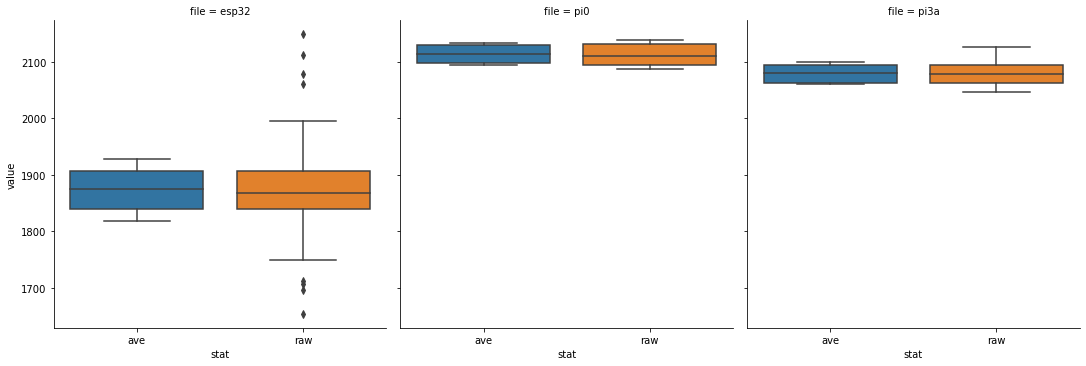

In [6]:
#fig = plt.figure(figsize=(6,4))
comparedf = pd.melt(pivoted, id_vars=['file', 'sample', 'sensor', 'delta', 'time'], var_name='stat')
a = sns.catplot(x='stat', y='value', col='file', data=comparedf, kind='box', ci='sd')
plt.show()

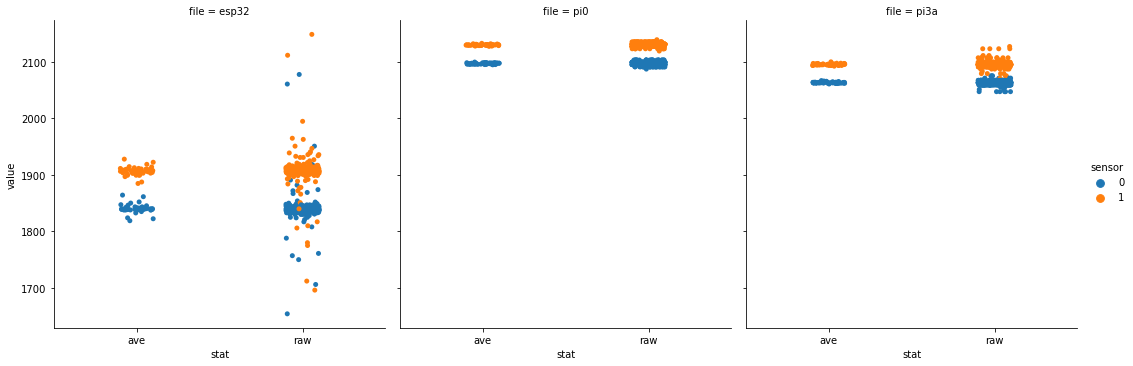

In [7]:
b = sns.catplot(x='stat', y='value', data=comparedf, hue='sensor', col='file', kind='strip')

sns.boxplot(x='file', y='value', data=comparedf, hue='stat')

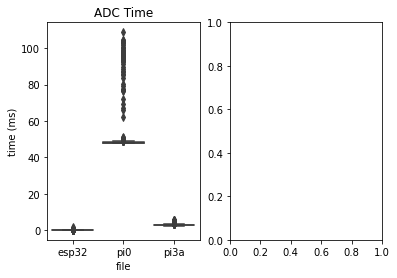

In [8]:
fig,axs = plt.subplots(1,2, sharex=False, sharey=False, squeeze=True)  # 1 row, 2 col?
g = sns.boxplot(x='file', y='time', data=pivoted, ax=axs[0])
#g.set(ylim=(1500, 2250))
g.set_title('ADC Time')
g.set_ylabel('time (ms)')
#plt.title('ADC Average')
#plt.ylim(1500, 2250)
#h = sns.boxplot(x='file', y='raw', data=pivoted, ax=axs[1])
#h.set_title('ADC Raw')
#plt.title('ADC Raw')
#plt.ylim(1500, 2250)
#h.set(ylim=(1500, 2250))
#h.set_ylabel('raw')
plt.show()

/home/chawn1272/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chawn1272/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chawn1272/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

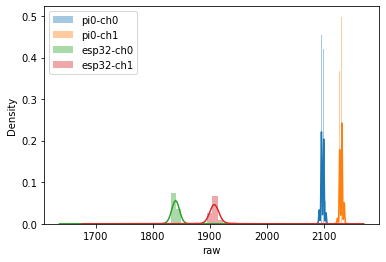

In [9]:
#fig = plt.figure(figsize=(6,4))
pi0df = pivoted[pivoted['file'] == 'pi0']
esp32df = pivoted[pivoted['file'] == 'esp32']
sns.distplot(pi0df[pi0df['sensor'] == 0].raw, label='pi0-ch0')
sns.distplot(pi0df[pi0df['sensor'] == 1].raw, label='pi0-ch1')
sns.distplot(esp32df[esp32df['sensor'] == 0].raw, label='esp32-ch0')
sns.distplot(esp32df[esp32df['sensor'] == 1].raw, label='esp32-ch1')
#fig.legend(labels=['pi0-ch0','pi0-ch1','esp32-ch0','exp32-ch1'])
plt.legend()
plt.show()

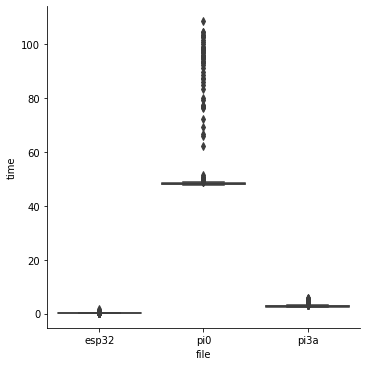

In [10]:
i = sns.catplot(x="file", y="time", data=pivoted, ci='sd', kind="box")